# Seasonal Color Recommendation System

The Seasonal Color Recommendation System collects user input on eye color, hair color, skin tone, and undertone to recommend a personalized seasonal color palette. Drawing inspiration from seasonal color theory, it identifies colors that best complement the user’s unique characteristics and provides an image of a celebrity with a similar seasonal type, along with a suggested jewelry style, to offer a complete visual representation of the matched look.


In [45]:
import zipfile
import os
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, Image
import warnings # Import the warnings module



In [46]:
pip install ipywidgets


In [47]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

# Preprocessing

In [48]:
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [49]:
seasonal_colors_df = pd.read_csv('/content/Seasonal_Color_Dataset_Processed_Version.csv')
seasonal_colors_df

Seasonal Type  Skin Class1 (%)  Skin Class2 (%)  Skin Class3 (%)  \
0     True Winter         1.000000              0.0         0.545455   
1   Bright Winter         0.928571              0.2         0.363636   
2     Dark Winter         0.857143              0.1         0.727273   
3    Light Summer         0.285714              0.6         0.000000   
4     Soft Summer         0.214286              0.5         0.272727   
5     Cool Summer         0.571429              0.2         0.545455   
6    Light Spring         0.428571              0.8         0.454545   
7   Bright Spring         0.142857              1.0         0.363636   
8     True Spring         0.571429              0.4         0.545455   
9     True Autumn         0.071429              0.6         0.909091   
10    Deep Autumn         0.000000              0.8         1.000000   
11    Soft Autumn         0.214286              0.5         0.727273   

    Skin Class4 (%)  Skin Class5 (%)  Skin Class6 (%)  Skin Class7 (%)  \
0          0.428571         0.142857         0.166667         0.000000   
1          0.142857         0.000000         0.166667         0.000000   
2          0.357143         0.285714         0.666667         0.666667   
3          0.000000         0.000000         0.000000         0.000000   
4          0.071429         0.142857         0.166667         0.000000   
5          0.142857         0.142857         0.166667         0.000000   
6          0.214286         0.428571         0.333333         0.333333   
7          0.142857         0.285714         0.166667         0.333333   
8          0.357143         0.571429         0.333333         0.000000   
9          1.000000         1.000000         0.666667         0.666667   
10         0.857143         0.857143         1.000000         1.000000   
11         0.785714         0.428571         0.500000         0.333333   

    Skin Class8 (%)  Eye: Light Blue (%)  ...  \
0               0.0             0.000000  ...   
1               0.0             0.166667  ...   
2               0.5             0.083333  ...   
3               0.0             0.833333  ...   
4               0.0             0.750000  ...   
5               0.0             0.916667  ...   
6               0.5             1.000000  ...   
7               0.0             0.666667  ...   
8               0.0             0.833333  ...   
9               0.5             0.083333  ...   
10              1.0             0.000000  ...   
11              0.0             0.166667  ...   

                                         Worst Colors  \
0              Golden and brown hues, warm soft tones   
1              Muted tones, dusty colors, warm shades   
2   Earthy tones, warm nudes, warm browns, oranges...   
3             Deep oranges, earthy browns, fiery reds   
4                             Neon, rich clear colors   
5          Warm tones, earthy shades like warm yellow   
6                         Dark or overpowering shades   
7                          Nudes, dusty-muted pastels   
8                     Cool-toned pastels, dark shades   
9                           Pastels and bright colors   
10                           Dusty colors and pastels   
11          Stark colors like black, bright neon hues   

              Suitable Metal Type           Hue        Value  \
0                          Silver          Cool       Medium   
1   Silver or sometimes Rose Gold  Cool/Neutral       Medium   
2                          Silver  Cool/Neutral         Deep   
3                          Silver  Cool/Neutral        Light   
4                          Silver  Cool/Neutral       Medium   
5                          Silver          Cool       Medium   
6                            Gold  Warm/Neutral        Light   
7               Gold or Rose Gold  Warm/Neutral       Medium   
8                            Gold          Warm       Medium   
9                            Gold          Warm       Medium   
10                 G

In [50]:
features = seasonal_colors_df.filter(regex='Eye|Hair|Skin|Undertone').copy()
features

Skin Class1 (%)  Skin Class2 (%)  Skin Class3 (%)  Skin Class4 (%)  \
0          1.000000              0.0         0.545455         0.428571   
1          0.928571              0.2         0.363636         0.142857   
2          0.857143              0.1         0.727273         0.357143   
3          0.285714              0.6         0.000000         0.000000   
4          0.214286              0.5         0.272727         0.071429   
5          0.571429              0.2         0.545455         0.142857   
6          0.428571              0.8         0.454545         0.214286   
7          0.142857              1.0         0.363636         0.142857   
8          0.571429              0.4         0.545455         0.357143   
9          0.071429              0.6         0.909091         1.000000   
10         0.000000              0.8         1.000000         0.857143   
11         0.214286              0.5         0.727273         0.785714   

    Skin Class5 (%)  Skin Class6 (%)  Skin Class7 (%)  Skin Class8 (%)  \
0          0.142857         0.166667         0.000000              0.0   
1          0.000000         0.166667         0.000000              0.0   
2          0.285714         0.666667         0.666667              0.5   
3          0.000000         0.000000         0.000000              0.0   
4          0.142857         0.166667         0.000000              0.0   
5          0.142857         0.166667         0.000000              0.0   
6          0.428571         0.333333         0.333333              0.5   
7          0.285714         0.166667         0.333333              0.0   
8          0.571429         0.333333         0.000000              0.0   
9          1.000000         0.666667         0.666667              0.5   
10         0.857143         1.000000         1.000000              1.0   
11         0.428571         0.500000         0.333333              0.0   

    Eye: Light Blue (%)  Eye: Dark Blue (%)  ...  Eye: Black (%)  \
0              0.000000            0.846154  ...        1.000000   
1              0.166667            0.692308  ...        0.666667   
2              0.083333            1.000000  ...        1.000000   
3              0.833333            0.230769  ...        0.000000   
4              0.750000            0.384615  ...        0.000000   
5              0.916667            0.692308  ...        0.333333   
6              1.000000            0.230769  ...        0.000000   
7              0.666667            0.384615  ...        0.000000   
8              0.833333            0.307692  ...        0.000000   
9              0.083333            0.000000  ...        0.333333   
10             0.000000            0.000000  ...        0.666667   
11             0.166667            0.076923  ...        0.333333   

    Hair: Blonde (%)  Hair: Dark Blonde (%)  Hair: Brown (%)  \
0           0.066667               0.142857         0.153846   
1           0.200000               0.285714         0.461538   
2           0.000000               0.000000         0.000000   
3           1.000000               0.857143         0.461538   
4           0.866667               1.000000         0.846154   
5           0.466667               0.785714         0.923077   
6           1.000000               0.857143         0.769231   
7           0.400000               0.857143         0.923077   
8           0.866667               0.857143         0.769231   
9           0.200000               0.285714         1.000000   
10          0.066667               0.214286         0.846154   
11          0.800000               1.000000         1.000000   

    Hair: Dark Brown (%)  Hair: Black (%)  Hair: Red (%)  Hair: Grey (%)  \
0               0.928571           0.9375         0.0000          0.9375   
1               0.857143           0.7500         0.0000          0.7500   
2               1.000000           1.0000         0.0000          1.0000   
3               0.000000           0.0000         0.1250

In [51]:
zip_path = '/content/Color Recommender.zip'
extraction_path = '/content/extracted_images'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)

base_folder = os.path.join(extraction_path, 'Color Recommender')
celebrities_folder = os.path.join(base_folder, 'Celebrities')
jewelry_folder = os.path.join(base_folder, 'Jewelry')


Collect user preferences  


Dropdown(description='Eye Color:', options=('Eye: Light Blue (%)', 'Eye: Dark Blue (%)', 'Eye: Light Green (%)…

Dropdown(description='Hair Color:', options=('Hair: Blonde (%)', 'Hair: Dark Blonde (%)', 'Hair: Brown (%)', '…

Dropdown(description='Skin Tone:', options=('Skin Class1 (%)', 'Skin Class2 (%)', 'Skin Class3 (%)', 'Skin Cla…

Dropdown(description='Undertone:', options=('cool', 'warm'), value='cool')

Button(description='Submit', style=ButtonStyle())

Collected Preferences: {'Eye: Light Blue (%)': 1, 'Hair: Blonde (%)': 1, 'Skin Class1 (%)': 1, 'Undertone': 'cool'}
Closest Seasonal Type: Light Summer


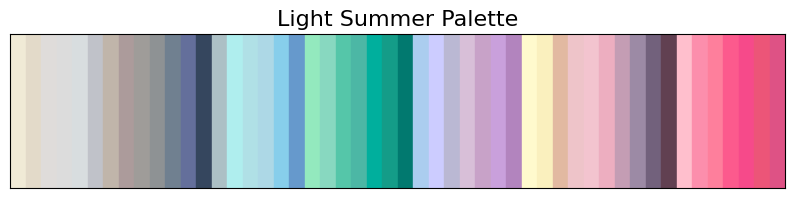

HTML(value='<h4>Celebrity Image for Light Summer</h4>')

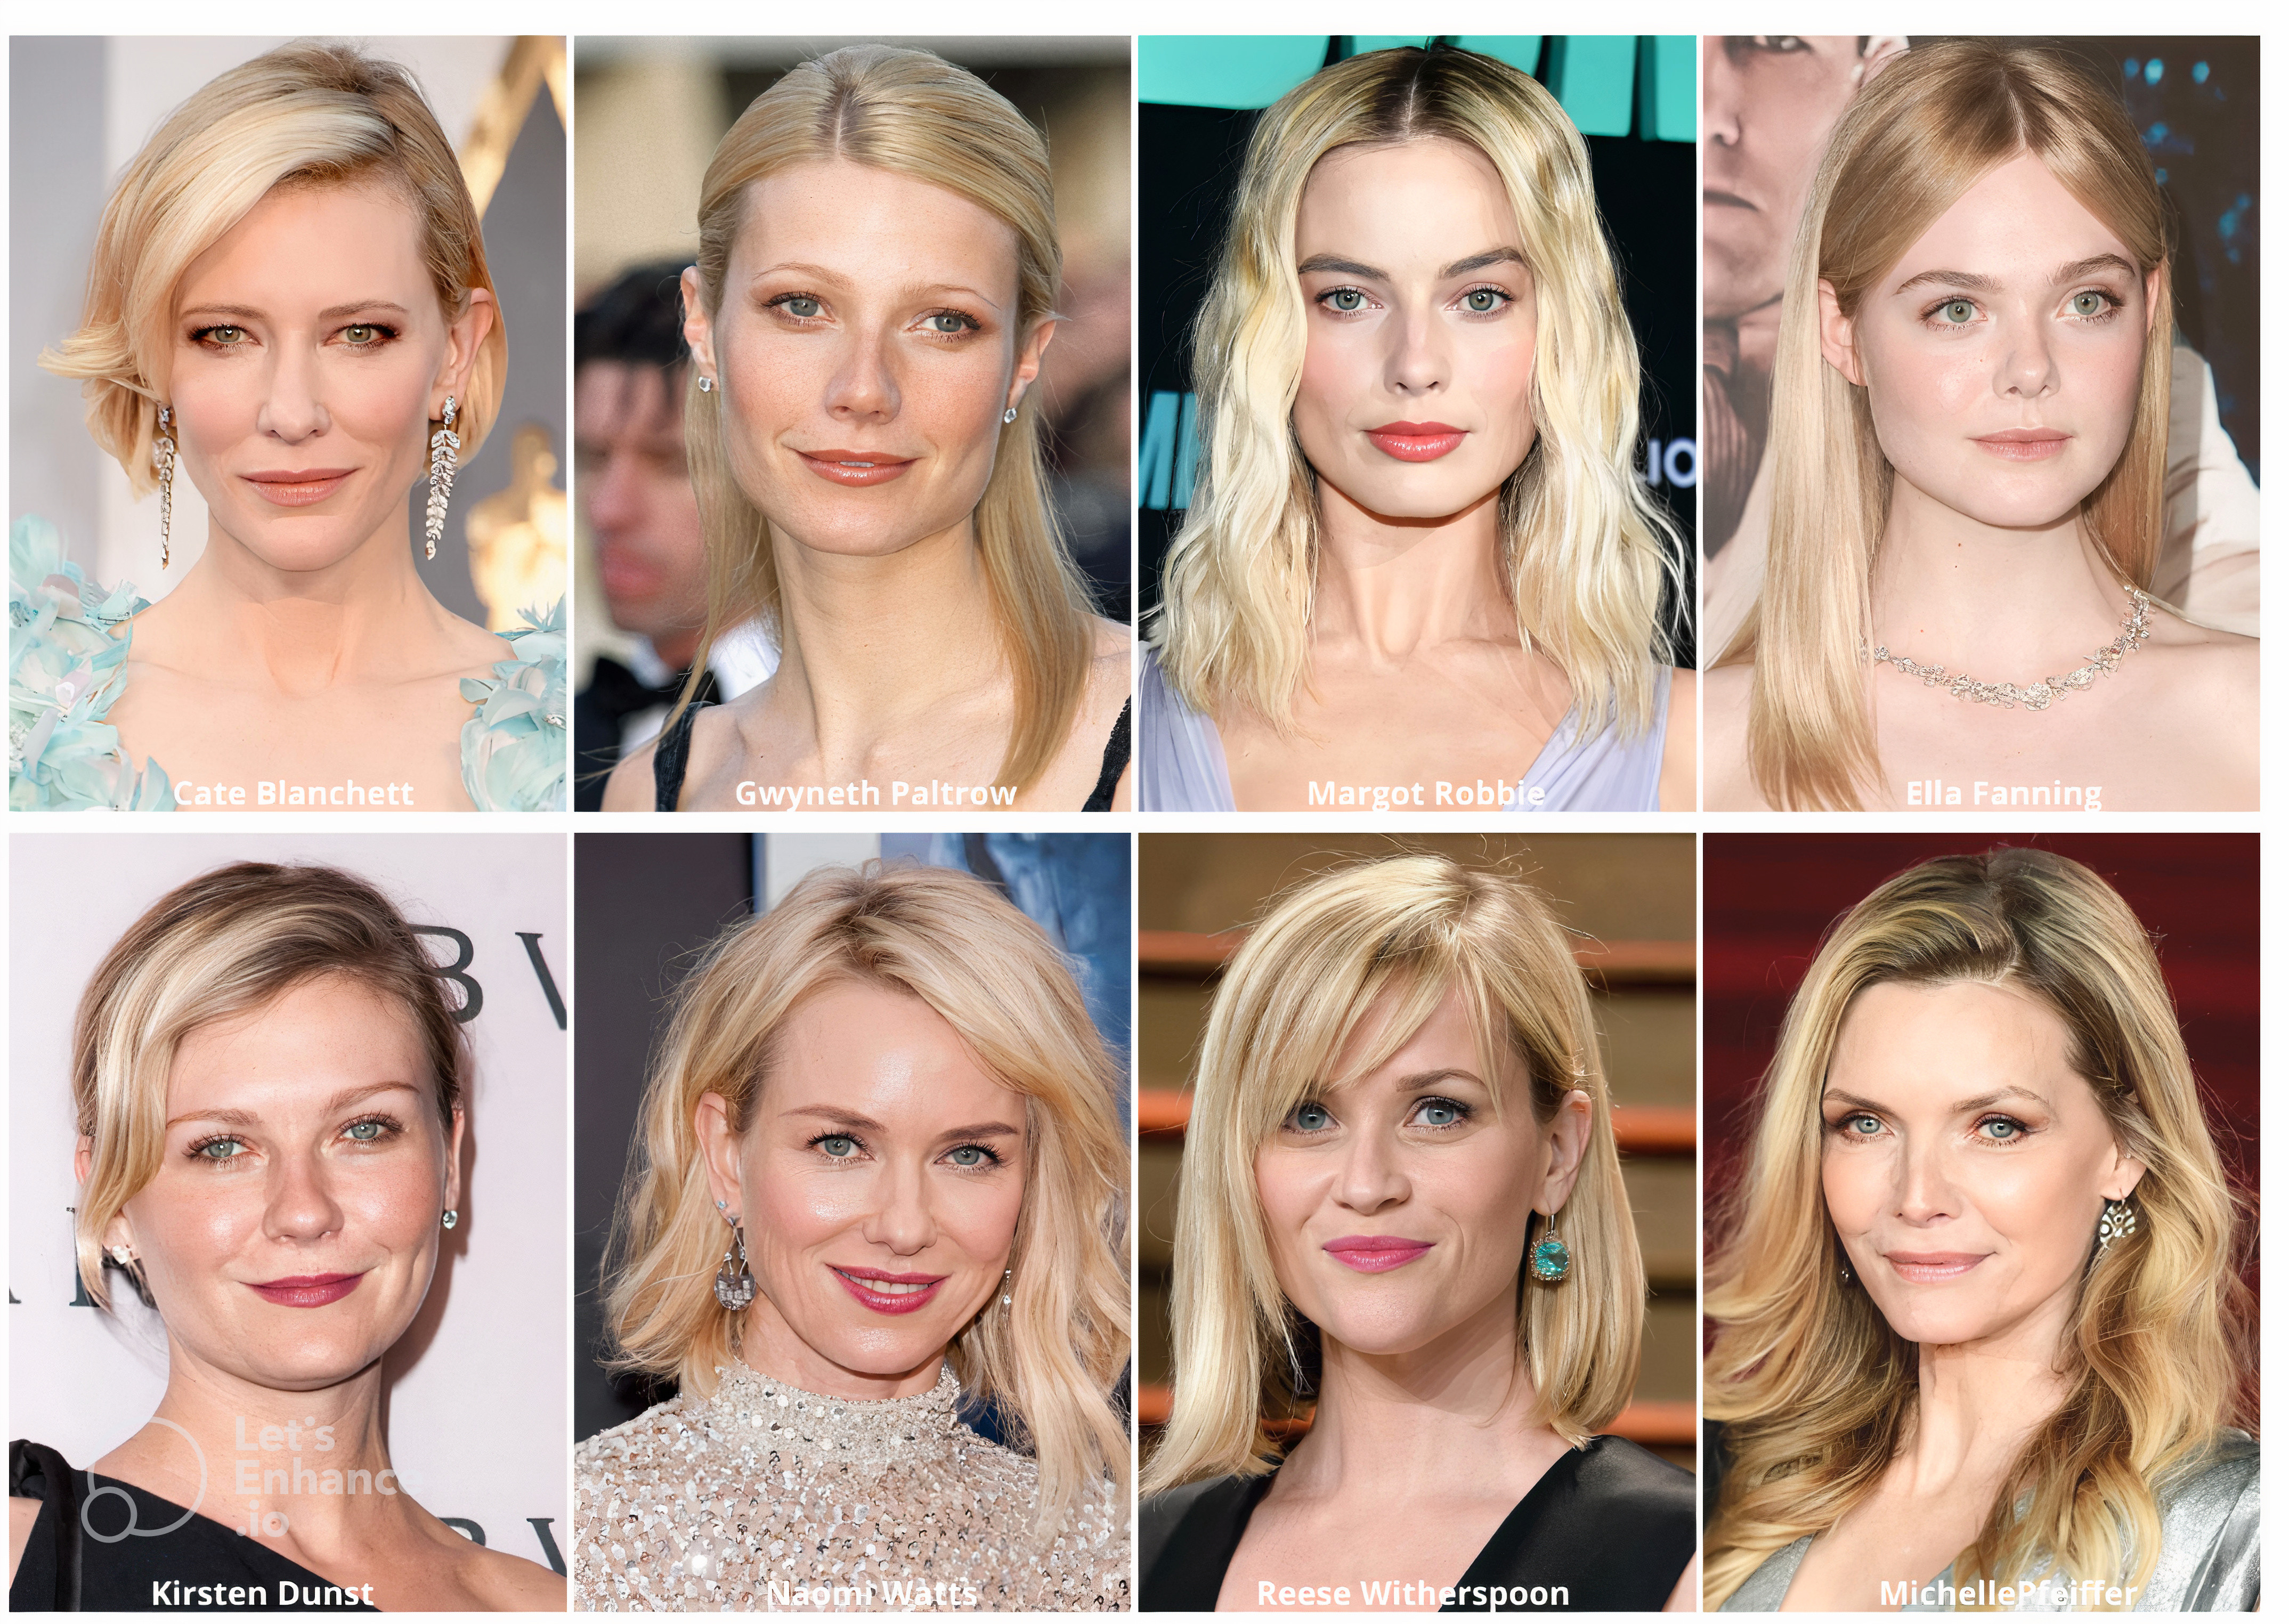

HTML(value='<h4>Jewelry Image for Light Summer</h4>')

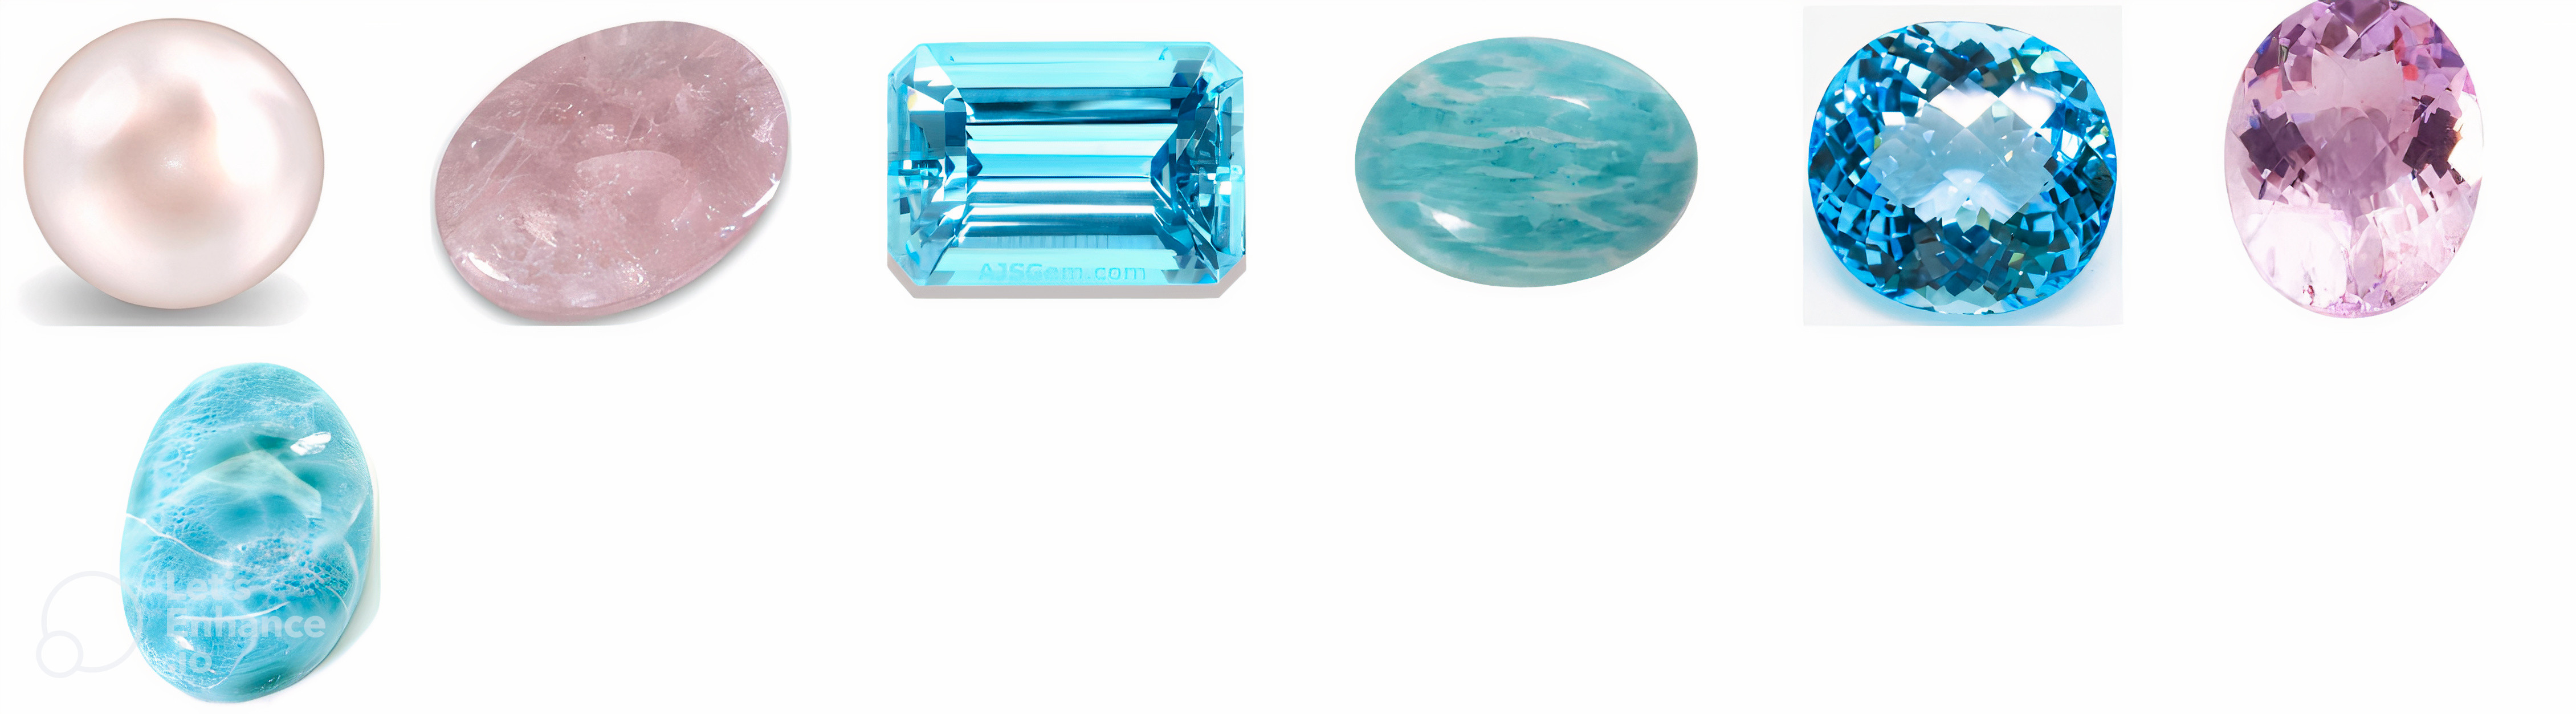

In [58]:
# Load the dataset
seasonal_colors_df = seasonal_colors_df

# Extract relevant features for processing
features = seasonal_colors_df.filter(regex='Eye|Hair|Skin|Undertone').copy()

def get_user_preferences():
    # Dropdown widgets for user preferences
    eye_dropdown = widgets.Dropdown(
        options=features.filter(regex='Eye').columns.tolist(),
        description='Eye Color:'
    )
    hair_dropdown = widgets.Dropdown(
        options=features.filter(regex='Hair').columns.tolist(),
        description='Hair Color:'
    )
    skin_dropdown = widgets.Dropdown(
        options=features.filter(regex='Skin').columns.tolist(),
        description='Skin Tone:'
    )
    undertone_dropdown = widgets.Dropdown(
        options=['cool', 'warm'],
        description='Undertone:'
    )

    # Display the dropdown widgets
    display(eye_dropdown, hair_dropdown, skin_dropdown, undertone_dropdown)

    def on_button_clicked(b):
        # Collect user preferences
        preferences = {
            eye_dropdown.value: 1,
            hair_dropdown.value: 1,
            skin_dropdown.value: 1,
            'Undertone': undertone_dropdown.value
        }
        print("Collected Preferences:", preferences)

        # Process the preferences
        user_vector = create_user_vector(preferences)
        closest_seasonal_type = find_closest_seasonal_type(user_vector)

        print(f"Closest Seasonal Type: {closest_seasonal_type['Seasonal Type']}")
        display_color_palette(closest_seasonal_type)
        display_celebrity_image(closest_seasonal_type['Seasonal Type'], width=500)
        display_jewelry_image(closest_seasonal_type['Seasonal Type'], width=500)

    # Submit button
    submit_button = widgets.Button(description='Submit')
    submit_button.on_click(on_button_clicked)
    display(submit_button)

def create_user_vector(preferences):
    # Initialize user vector
    user_vector = np.zeros(features.shape[1])

    # Map preferences to the feature vector
    for key, value in preferences.items():
        if key in features.columns:
            user_vector[features.columns.get_loc(key)] = value

    # Encode undertone in the vector
    undertone_col = f'Undertone_{preferences["Undertone"].capitalize()}'
    if undertone_col in features.columns:
        user_vector[features.columns.get_loc(undertone_col)] = 1

    return user_vector.reshape(1, -1)

def find_closest_seasonal_type(user_vector):
    # Calculate similarity between user vector and dataset
    feature_matrix = features.values
    similarities = cosine_similarity(user_vector, feature_matrix)
    closest_idx = np.argmax(similarities)
    return seasonal_colors_df.iloc[closest_idx]

def display_color_palette(seasonal_type):
    # Display seasonal color palette
    if 'Palette Colors (Hex)' in seasonal_type:
        colors = ast.literal_eval(seasonal_type['Palette Colors (Hex)'])

        fig, ax = plt.subplots(figsize=(10, 2))
        for i, color in enumerate(colors):
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

        ax.set_xlim(0, len(colors))
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(f"{seasonal_type['Seasonal Type']} Palette", fontsize=16)
        plt.show()
    else:
        print("Palette information is missing.")

def display_celebrity_image(seasonal_type, width=500):
    # Display celebrity image associated with seasonal type
    celebrity_image_path = os.path.join(celebrities_folder, f"{seasonal_type} Celebrities.jpg")
    if not os.path.exists(celebrity_image_path):
        celebrity_image_path = os.path.join(celebrities_folder, f"{seasonal_type} Celebrities.png")

    if os.path.exists(celebrity_image_path):
        display(widgets.HTML(f"<h4>Celebrity Image for {seasonal_type}</h4>"))
        display(Image(filename=celebrity_image_path, width=width))
    else:
        print(f"Celebrity image not found for {seasonal_type}.")

def display_jewelry_image(seasonal_type, width=500):
    # Display jewelry image associated with seasonal type
    jewelry_image_path = os.path.join(jewelry_folder, f"{seasonal_type}.jpg")
    if not os.path.exists(jewelry_image_path):
        jewelry_image_path = os.path.join(jewelry_folder, f"{seasonal_type}.png")

    if os.path.exists(jewelry_image_path):
        display(widgets.HTML(f"<h4>Jewelry Image for {seasonal_type}</h4>"))
        display(Image(filename=jewelry_image_path, width=width))
    else:
        print(f"Jewelry image not found for {seasonal_type}.")

# Start the process to get user preferences
get_user_preferences()
